In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [25]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

df8=pd.read_excel("/content/drive/MyDrive/Google Collab/car.xlsx")
df8 = df8.replace('low',0)
df8 = df8.replace('med',1)
df8 = df8.replace('high',2)
df8 = df8.replace('vhigh',3)
df8 = df8.replace('5more',5)
df8 = df8.replace('small',0)
df8 = df8.replace('big',2)
df8 = df8.replace('unacc',0)
df8 = df8.replace('acc',1)
df8 = df8.replace('good',2)
df8 = df8.replace('vgood',0)

df8

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,2,1,1,2
1724,0,0,5,4,1,2,0
1725,0,0,5,4,2,0,0
1726,0,0,5,4,2,1,2


In [26]:
target=df8[' decision']
target


0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    0
1725    0
1726    2
1727    0
Name:  decision, Length: 1728, dtype: int64

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [28]:
gnb.fit(df8,target)

GaussianNB()

In [29]:
gnb.score(df8,target)

1.0

In [31]:
predicted = gnb.predict([[0,1,3,4,0,2,2]])
print("Predicted class:",predicted)
print(target[predicted])

Predicted class: [2]
2    0
Name:  decision, dtype: int64


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df8, target, test_size=0.3,random_state=109)

In [35]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

[[376   0   0]
 [  0 120   0]
 [  0   0  23]]


Text(73.45000000000006, 0.5, 'Predicted')

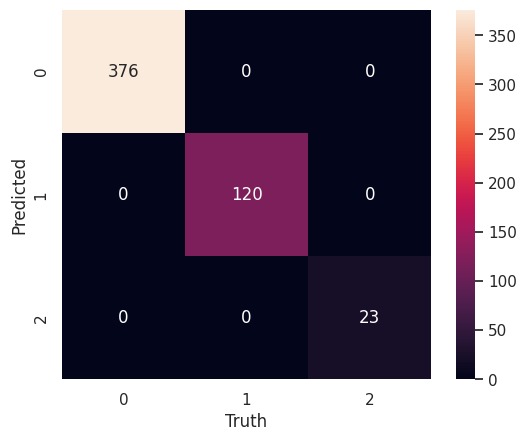

In [38]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_pred,y_test)
print(matrix)

names = np.unique(y_pred)
sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=True, xticklabels=names,yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')